In [1]:
from tensorflow import keras
import numpy as np

(xtrain,ytrain),(xtest,ytest) = keras.datasets.cifar100.load_data(label_mode="fine")
xtrain = xtrain/255
xtest = xtest/255
print(xtrain.shape)

169001437/169001437 [==============================] - 5s 0us/step
(50000, 32, 32, 3)


In [15]:
cnn_model = keras.models.Sequential()
#cnn layer1
cnn_model.add(keras.layers.Conv2D(50,3,activation='relu',input_shape=(32,32,3)))
cnn_model.add(keras.layers.Conv2D(50,3,activation='relu'))
cnn_model.add(keras.layers.Conv2D(50,3,activation='relu'))
#maxpooling
cnn_model.add(keras.layers.MaxPool2D((2,2)))

#cnn layer2
cnn_model.add(keras.layers.Conv2D(50,3,activation='relu'))
cnn_model.add(keras.layers.Conv2D(50,3,activation='relu'))
cnn_model.add(keras.layers.Conv2D(50,3,activation='relu'))
#maxpooling
cnn_model.add(keras.layers.MaxPool2D((2,2)))

#feed forward netwrok
cnn_model.add(keras.layers.Flatten())

cnn_model.add(keras.layers.Dense(128,activation='relu')) #hidden layer
cnn_model.add(keras.layers.Dense(256,activation='relu'))
cnn_model.add(keras.layers.Dense(256,activation='relu'))

loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True)
cnn_model.compile(optimizer='sgd',loss=loss,metrics=['accuracy'])
cnn_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 30, 30, 50)        1400      
                                                                 
 conv2d_13 (Conv2D)          (None, 28, 28, 50)        22550     
                                                                 
 conv2d_14 (Conv2D)          (None, 26, 26, 50)        22550     
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 13, 13, 50)        0         
 g2D)                                                            
                                                                 
 conv2d_15 (Conv2D)          (None, 11, 11, 50)        22550     
                                                                 
 conv2d_16 (Conv2D)          (None, 9, 9, 50)          22550     
                                                      

In [16]:
history = cnn_model.fit(xtrain,ytrain,epochs=100,validation_data=(xtest,ytest))

Epoch 1/100
1563/1563 [==============================] - 14s 8ms/step - loss: 5.2419 - accuracy: 0.0102 - val_loss: 5.1045 - val_accuracy: 0.0108
Epoch 2/100
1563/1563 [==============================] - 11s 7ms/step - loss: 5.0193 - accuracy: 0.0208 - val_loss: 4.7913 - val_accuracy: 0.0334
Epoch 3/100
1563/1563 [==============================] - 11s 7ms/step - loss: 4.5449 - accuracy: 0.0478 - val_loss: 4.4438 - val_accuracy: 0.0494
Epoch 4/100
1563/1563 [==============================] - 11s 7ms/step - loss: 4.2749 - accuracy: 0.0746 - val_loss: 4.1829 - val_accuracy: 0.0870
Epoch 5/100
1563/1563 [==============================] - 11s 7ms/step - loss: 4.0758 - accuracy: 0.1034 - val_loss: 4.0452 - val_accuracy: 0.0981
Epoch 6/100
1563/1563 [==============================] - 11s 7ms/step - loss: 3.9185 - accuracy: 0.1291 - val_loss: 3.8783 - val_accuracy: 0.1361
Epoch 7/100
1563/1563 [==============================] - 11s 7ms/step - loss: 3.7714 - accuracy: 0.1513 - val_loss: 3.7864 -

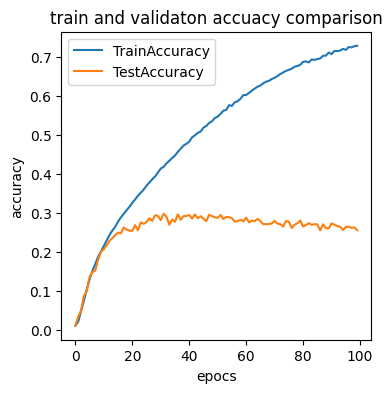

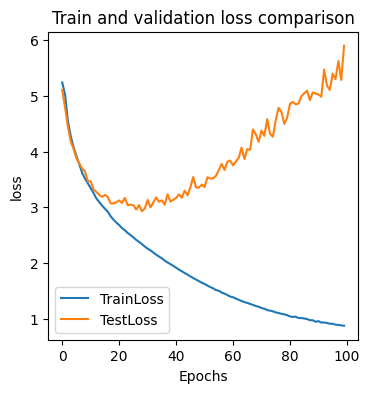

In [17]:
import matplotlib.pyplot as plt

plt.figure(1,(4,4))
plt.plot(history.epoch,history.history['accuracy'],label='TrainAccuracy')
plt.plot(history.epoch,history.history['val_accuracy'],label='TestAccuracy')
plt.title('train and validaton accuacy comparison')
plt.xlabel('epocs')
plt.ylabel('accuracy')
plt.legend()
plt.figure(2,(4,4))
plt.plot(history.epoch,history.history['loss'],label='TrainLoss')
plt.plot(history.epoch,history.history['val_loss'],label='TestLoss')
plt.title('Train and validation loss comparison')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()